In [1]:
import os, yaml, sys
import numpy as np
import torch
import h5py
from torchvision import models
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt
from scipy.io import loadmat
ENV = os.getenv("MY_ENV", "dev")
with open("../../config.yaml", "r") as f:
    config = yaml.safe_load(f)
paths = config[ENV]["paths"]
sys.path.append(paths["src_path"])
from general_utils.utils import BrainAreas, get_triu_perms, load_img_natraster, get_device, print_wise
from general_utils.dRSA import across_areas_dRSA
device = get_device()

07:43:11 - device being used: mps


In [2]:
from dataclasses import dataclass, field

@dataclass
class Cfg:
    monkey_name: str = 'paul' 
    date: str = '230204'
    similarity_measure: str = 'cosine'
    new_fs: int = 50 # Hz
    RDM_metric: str = 'cosine'
    RSA_metric: str = 'correlation'
cfg = Cfg()

In [ ]:
# TEST IF ACROSS BRAIN AREAS WORK
# RUN IT ON THE CLUSTER
# here you'd need to load the rasters first
raster = load_img_natraster(paths, cfg.monkey_name, cfg.date, new_fs=cfg.new_fs)
ba_obj = BrainAreas(cfg.monkey_name)
brain_areas = ba_obj.get_brain_areas()
tasks_list = get_triu_perms(brain_areas)
drsa_mat = across_areas_dRSA(paths, 0, tasks_list[0], raster, ba_obj, cfg)

07:43:29 - rank 0 Start computing dRSA across V2 and V1
07:43:35 - rank 0 Computed dRSA across V2 and V1 
at /Users/tizianocausin/livingstone_lab_local/tiziano/results/paul_230204_V2-V1_images_cosine_50Hz.npz


In [4]:
drsa_mat = np.load("/Users/tizianocausin/livingstone_lab_local/tiziano/results/paul_230204_V2-V1_images_cosine_50Hz.npz")['data']

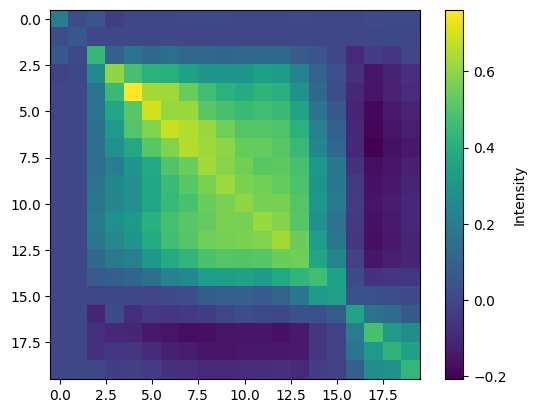

In [5]:
# UNDERSTAND/SHOW differences in chosen metric
plt.imshow(drsa_mat)
plt.colorbar(label="Intensity")

07:45:46 - The number of datapoints used to compute extreme offsets is < than 10
07:45:46 - The number of datapoints used to compute extreme offsets is < than 10
07:45:46 - The number of datapoints used to compute extreme offsets is < than 10
07:45:46 - The number of datapoints used to compute extreme offsets is < than 10
07:45:46 - The number of datapoints used to compute extreme offsets is < than 10
07:45:46 - The number of datapoints used to compute extreme offsets is < than 10
07:45:46 - The number of datapoints used to compute extreme offsets is < than 10


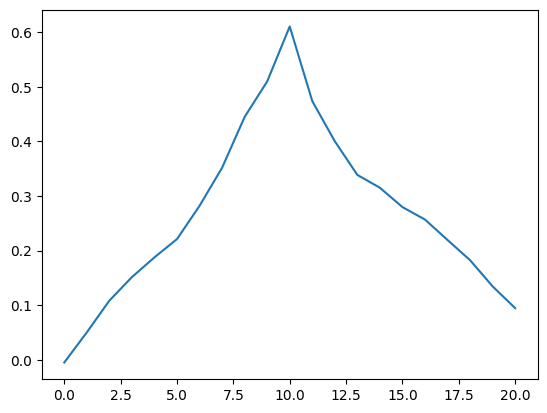

In [ ]:
from general_utils.utils import get_lagplot_subset
plt.plot(get_lagplot_subset(drsa_mat,np.arange(2,15), max_lag=10));

In [140]:
dRSA = compute_dRSA(rasters_smooth[:20, :50, :1000],rasters_smooth[300:330, :50, :1000])

Text(0.5, 1.0, 'V1 -> probe tip')

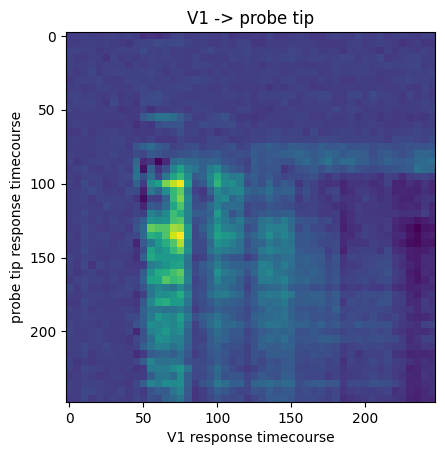

In [241]:
fig, ax = plt.subplots()
ax.imshow(dRSA)
ax.set_xticks([0, 10, 20, 30, 40])
ax.set_xticklabels(np.array([0, 10, 20, 30, 40])*cfg.avg_win)
ax.set_yticks([0, 10, 20, 30, 40])
ax.set_yticklabels(np.array([0, 10, 20, 30, 40])*cfg.avg_win)
ax.set_ylabel("probe tip response timecourse")
ax.set_xlabel("V1 response timecourse")
ax.set_title("V1 -> probe tip")

35 ms


Text(0.5, 1.0, 'V1 -> probe tip')

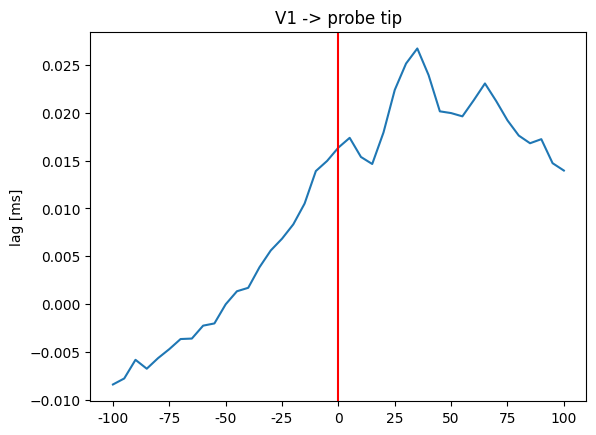

In [242]:
lp = get_lagplot_subset(dRSA, np.arange(20, 40))
fig, ax = plt.subplots()
print((np.argmax(lp) - 20)*5, "ms")
ax.plot(lp)
ax.axvline(20, color='red')
ax.set_xticks(np.arange(0, 41, 5))
ax.set_xticklabels(np.arange(-20, 21, 5)*cfg.avg_win)
ax.set_ylabel("similarity (corr)")
ax.set_ylabel("lag [ms]")
ax.set_title("V1 -> probe tip")